In [22]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3/mean'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3/data/L{L},T{T:.1f},dt{dt:.1f},p{p},dir{d},s{sss}.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(1, time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}.npy"), S_var)

In [23]:
for L in [8]:
    for T in [100.0]:
        for dt in[1.0]:
            for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]: 
                   for d in ["Z"]:
                       average_data(L,T,dt,p,d,500,100)

/Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:190: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


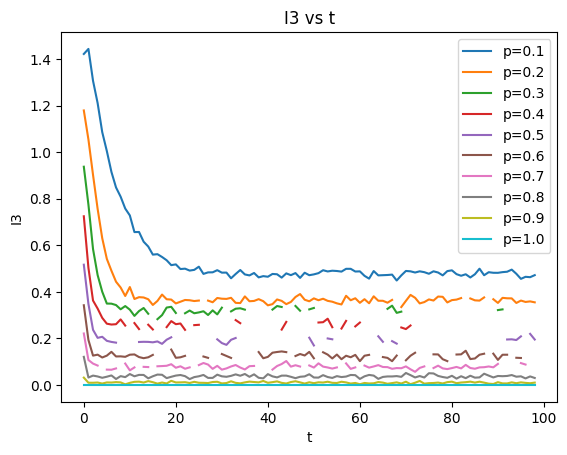

In [16]:
import matplotlib.pyplot as plt

p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mean_dir = '/Users/uditvarma/Documents/s3/mean'

for p_val in p_values:
    file_path = os.path.join(mean_dir, f"Emean_L{L},T{T},dt{dt},p{p_val}.npy")
    if os.path.isfile(file_path):
        S_mean = np.load(file_path)
        plt.plot(S_mean, label=f'p={p_val}')

plt.xlabel('t')
plt.ylabel('I3')
plt.title(f'I3 vs t')
plt.legend()
plt.show()

In [21]:
len(np.load('/Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.1,dirZ,s9.npy'))

100

In [25]:
import numpy as np
import os

target_dir = "/Users/uditvarma/Documents/s3"

for root, _, files in os.walk(target_dir):
    for file in files:
        if file.endswith(".npy"):
            path = os.path.join(root, file)
            try:
                arr = np.load(path)
                if np.isneginf(arr).any():
                    print(f"-inf found in file: {path}")
            except Exception as e:
                print(f"Failed to read {path}: {e}")


Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py2-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py2-np0-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py3-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/scipy/stats/tests/data/levy_stable/stable-loc-scale-sample-data.npy: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.2,dirZ,s90.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s68.npy

/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_44944/593828401.py:11: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  arr = np.load(path)


-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.7,dirZ,s71.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s267.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s87.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s449.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s196.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.5,dirZ,s365.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.3,dirZ,s187.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.7,dirZ,s233.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.3,dirZ,s346.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s154.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s413.npy
-inf found i

In [26]:
np.load('/Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.2,dirZ,s90.npy')

array([ 0.00000000e+00,  2.43687023e-01,  9.94432974e-01,  1.02927900e+00,
        1.29050955e+00,  1.70975665e+00,  1.22486983e+00,  1.13755497e+00,
        5.78249180e-01,  6.72979934e-01,  9.98725165e-01,  1.50723786e+00,
        7.45376554e-01,  9.30934243e-01,  9.91337170e-01,  2.51042630e-01,
        1.61430816e-04, -4.44089210e-16,  1.59007427e+00,  1.79254351e-01,
        5.90448739e-01,  7.38022888e-01,  1.33683878e+00,  1.26677803e+00,
        2.50283374e-01,  8.46837050e-01,  9.15833023e-01,            -inf,
        9.64031467e-01,  2.04098549e-01,  2.22044605e-16,  0.00000000e+00,
        1.27886060e+00,  2.63775978e-01,  9.12261618e-01,  6.09342887e-01,
        6.82373677e-01,  1.25000119e+00,  2.82215176e-01,  1.11292126e+00,
        1.07192202e+00,  1.24175410e+00,  1.70082553e+00,  1.03784249e+00,
        1.00115729e+00,  5.04434981e-01,  7.09746448e-01,  8.47412693e-01,
        1.23670640e-01,  7.40248253e-01,  6.89403202e-02,  1.23217406e+00,
        1.17552817e+00,  